<a href="https://colab.research.google.com/github/AFBA1993/DeepLearningTutorials/blob/main/autoencoders/convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

In [3]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento),28,28, 1))
previsores_teste = previsores_teste.reshape((len(previsores_teste),28,28, 1))

previsores_treinamento = previsores_treinamento.astype('float32')/255
previsores_teste = previsores_teste.astype('float32')/255

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
autoencoder = Sequential()
#Encoder

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu',
                       input_shape = (28,28,1)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', 
                padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))


autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', 
                padding = 'same', strides = (2,2)))

autoencoder.add(Flatten())
autoencoder.add(Reshape((4,4,8)))

#Decoder
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', 
                padding = 'same'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', 
                padding = 'same'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 1, kernel_size = (3,3), activation = 'sigmoid', 
                padding = 'same'))


In [9]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_2 (Flatten)         (None, 128)              

In [11]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 10, batch_size = 256,
                validation_data = (previsores_teste, previsores_teste))

Epoch 1/10
235/235 [==============================] - 62s 262ms/step - loss: 0.1675 - accuracy: 0.7946 - val_loss: 0.1415 - val_accuracy: 0.8006
Epoch 2/10
235/235 [==============================] - 61s 261ms/step - loss: 0.1330 - accuracy: 0.8038 - val_loss: 0.1231 - val_accuracy: 0.8064
Epoch 3/10
235/235 [==============================] - 61s 260ms/step - loss: 0.1203 - accuracy: 0.8080 - val_loss: 0.1151 - val_accuracy: 0.8078
Epoch 4/10
235/235 [==============================] - 61s 261ms/step - loss: 0.1145 - accuracy: 0.8093 - val_loss: 0.1110 - val_accuracy: 0.8085
Epoch 5/10
235/235 [==============================] - 62s 262ms/step - loss: 0.1107 - accuracy: 0.8101 - val_loss: 0.1078 - val_accuracy: 0.8100
Epoch 6/10
235/235 [==============================] - 61s 260ms/step - loss: 0.1081 - accuracy: 0.8107 - val_loss: 0.1058 - val_accuracy: 0.8106
Epoch 7/10
235/235 [==============================] - 61s 260ms/step - loss: 0.1059 - accuracy: 0.8111 - val_loss: 0.1037 - val_ac

In [13]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_2').output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                           

In [19]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

In [17]:
imagens_codificadas


array([[[[1.5318612e-05],
         [4.3675841e-09],
         [2.4641551e-09],
         ...,
         [8.2806879e-11],
         [2.6863700e-09],
         [3.0931878e-07]],

        [[3.3728196e-07],
         [1.4703886e-11],
         [8.5906993e-12],
         ...,
         [3.0836233e-13],
         [8.0394164e-11],
         [2.1057065e-09]],

        [[4.6959602e-07],
         [4.8864215e-11],
         [4.7233443e-11],
         ...,
         [1.3014069e-13],
         [5.0116970e-11],
         [1.2166526e-09]],

        ...,

        [[5.7468191e-10],
         [4.7635498e-15],
         [1.3372632e-14],
         ...,
         [8.8631118e-08],
         [4.9552233e-07],
         [1.7628931e-06]],

        [[3.7712575e-10],
         [1.9619947e-15],
         [6.3248251e-15],
         ...,
         [1.0678175e-07],
         [4.6873160e-07],
         [1.6101046e-06]],

        [[2.8424328e-08],
         [3.3533779e-12],
         [9.4714601e-12],
         ...,
         [1.6811878e-06],
        

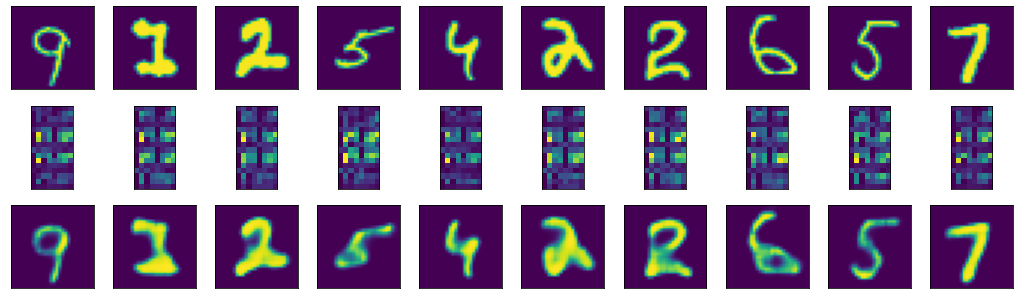

In [20]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):   
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16,8))
    plt.xticks(())
    plt.yticks(())
    
    # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())